In [57]:
import torch
from torch import nn
import torch.nn.functional as F
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv, SAGEConv
from torch_geometric.data import Data
from torch_geometric.datasets import QM9, TUDataset, ZINC, Planetoid, Amazon, Coauthor, CitationFull
from torch_geometric.loader import DataLoader
import torch.optim as optim
from ogb.nodeproppred import PygNodePropPredDataset
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch_geometric.transforms import RandomNodeSplit
from torch_geometric.transforms import NormalizeFeatures
import pandas as pd
import json

In [2]:
# Î∂ÑÏúÑÏàò Ï†ïÎ≥¥Î•º ÎÖ∏Îìú ÌäπÏßïÏóê Ìè¨Ìï® : Î∂ÑÏúÑÏàò Í∞í ÏûêÏ≤¥Í∞Ä ÌïôÏäµÏùÑ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ïú†ÎèÑÌï† Ïàò ÏûàÎèÑÎ°ù Ï∂îÍ∞Ä
# Î∂ÑÏúÑÏàò Ï†ïÎ≥¥ ÌôïÏû•ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
# Î∂ÑÏúÑÏàò Ï†ïÎ≥¥Î•º Ï∂îÍ∞ÄÌïòÏó¨ GNNÏù¥ ÏûÖÎ†• ÌäπÏÑ±ÏóêÏÑú Î∂ÑÏúÑÏàòÎ•º ÌïôÏäµ Í∞ÄÎä•ÌïòÎèÑÎ°ù Î≥ÄÍ≤Ω
# Í∞íÏùò Ïä§ÏºÄÏùºÎßÅÏùÑ Ï°∞Ï†ï(12Î∞∞ ÌôïÎåÄ)ÌïòÏó¨ ÌïôÏäµ ÏïàÏ†ïÏÑ±ÏùÑ Ï¶ùÍ∞Ä(Sigmoid ÏòÅÏó≠ ÎÇ¥ ÌôúÏö©)
# expand()Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï∞®Ïõê Ïú†ÏßÄ
# tauÎäî Î∂ÑÏúÑÏàò Ïù¥Î°ú Í∏∞Î≥∏Ï†ÅÏúºÎ°ú 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏù¥Îã§.
# ÌïòÏßÄÎßå Îî•Îü¨Îãù Î™®Îç∏ÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏûÖÎ†•Í∞íÏù¥ ÎÑàÎ¨¥ ÏûëÍ±∞ÎÇò ÌÅ∞ Í≤ΩÏö∞, ÌïôÏäµÏù¥ Ïñ¥Î†§ÏõåÏßÄÎäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉù
#  0~1 Î≤îÏúÑÏùò Í∞íÏùÄ Îß§Ïö∞ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê Ïã†Í≤ΩÎßùÏùò ÌôúÏÑ±Ìôî Ìï®Ïàò(Ïòà: ReLU, tanh)ÏóêÏÑú Í±∞Ïùò Î≥ÄÌôîÎ•º ÏùºÏúºÌÇ§ÏßÄ ÏïäÏùÑ ÏàòÎèÑ ÏûàÏäµÎãàÎã§.
# ÎßéÏùÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏(ÌäπÌûà Ïã†Í≤ΩÎßù)ÏùÄ ÏûÖÎ†• ÌäπÏßïÏù¥ ÌèâÍ∑† 0, Ï†ÅÏ†àÌïú Î∂ÑÏÇ∞ÏùÑ Í∞ÄÏßÄÎ©¥ ÌïôÏäµÏù¥ Ïûò Îê®.
# ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨(ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1)Ïùò Í≤ΩÏö∞ ¬±3œÉ Íµ¨Í∞Ñ(ÏïΩ 99.7%Ïùò Îç∞Ïù¥ÌÑ∞)ÏùÄ ÎåÄÎûµ -3 ~ 3 Î≤îÏúÑÏóê ÏûàÏùå.
# 12Îäî ÏùºÎ∞òÏ†ÅÏù∏ Îî•Îü¨Îãù Î™®Îç∏Ïù¥ Ïûò ÌïôÏäµÌïòÎäî Í∞íÏùò Î≤îÏúÑ(-6 ~ 6)Î•º ÎßåÎì§Í∏∞ ÏúÑÌïú Í≤ΩÌóòÏ†ÅÏù∏ Í∞íÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

# GCN Íµ¨Ï°∞Î°ú ÏÑ§Í≥Ñ
# Ïó¨Îü¨ GNN Íµ¨Ï°∞ Ï§ë GCNÏù¥ Ïã§ÌóòÏ†ÅÏúºÎ°ú ÏòàÏ∏° ÏïàÏ†ïÏÑ±Ïù¥ Îçî ÎÜíÏùÄ Í≤ΩÏö∞Í∞Ä ÎßéÏùå
# GNN Í∏∞Î∞ò Î∂ÑÏúÑÏàò ÏòàÏ∏° Î™®Îç∏
# Ïù¥ Î™®Îç∏ÏùÄ Í∑∏ÎûòÌîÑ Ïã†Í≤ΩÎßù(GNN) Ï§ë ÌïòÎÇòÏù∏ GCN (Graph Convolutional Network) Í∏∞Î∞òÏúºÎ°ú, ÌäπÏ†ï Î∂ÑÏúÑÏàò(Quantile) Í∞íÏùÑ ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏûÖÎãàÎã§. 
# Ï¶â, Í∞Å ÎÖ∏ÎìúÏùò Í∞íÏùÑ "Ïó¨Îü¨ Î∂ÑÏúÑÏàò"Î°ú ÏòàÏ∏°Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Í≥ÑÎêú Í∑∏ÎûòÌîÑ Ïã†Í≤ΩÎßùÏûÖÎãàÎã§.

# Coverage Ï°∞Ï†ï Î©îÏª§ÎãàÏ¶ò Ï∂îÍ∞Ä : Coverage Î≥¥Ïû•Ïù¥ Î∂ÄÏ°±Ìï† Í≤ΩÏö∞ Ïã†Î¢∞ Íµ¨Í∞ÑÏùÑ ÏûêÎèô Ï°∞Ï†ï
# Coverage Î≥¥Ïû•ÏùÑ ÏúÑÌïú ÎèôÏ†Å Î∂ÑÏúÑÏàò Ï°∞Ï†ï (DQA)
# CoverageÍ∞Ä Î∂ÄÏ°±ÌïòÎ©¥ Ïã†Î¢∞ Íµ¨Í∞ÑÏùÑ ÎÑìÌûàÍ≥†, CoverageÍ∞Ä Í≥ºÌïòÎ©¥ Íµ¨Í∞ÑÏùÑ Ï§ÑÏù¥Îäî Î∞©ÏãùÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏

# Î∂ÑÏúÑÏàò ÏÜêÏã§ Ìï®Ïàò (Coverage + PIW ÏµúÏ†ÅÌôî Ìè¨Ìï®)
# PIW ÏµúÏ†ÅÌôî Ï∂îÍ∞Ä : Ïã†Î¢∞ Íµ¨Í∞Ñ Ìè≠ÏùÑ Ï§ÑÏù¥Îäî ÏÜêÏã§Ìï≠ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÏµúÏ†ÅÌôî

In [273]:
def augment(x, tau, scale_factor=12):
    """
    Î∂ÑÏúÑÏàò Í∞íÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞ÄÌïòÏó¨ GNNÏù¥ ÌïôÏäµÌï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôòÌïòÎäî Ìï®Ïàò.
    
    Args:
        x (torch.Tensor): ÏõêÎûò ÏûÖÎ†• ÌäπÏßïÍ∞í (batch_size, feature_dim)
        tau (torch.Tensor): Î∂ÑÏúÑÏàò Í∞í (batch_size, 1)
        scale_factor (float): Î∂ÑÏúÑÏàò Í∞íÏùò Î≥ÄÌôòÏùÑ Ï°∞Ï†àÌïòÎäî Ïä§ÏºÄÏùºÎßÅ Í≥ÑÏàò (Í∏∞Î≥∏Í∞í: 12)
        
    Returns:
        torch.Tensor: Î≥ÄÌôòÎêú ÏûÖÎ†• ÌäπÏßïÍ∞í (batch_size, feature_dim + 1)
    """
    tau = tau.view(-1, 1)  # tauÎ•º (batch_size, 1) ÌòïÌÉúÎ°ú Î≥ÄÌôò
    tau_transformed = (tau - 0.5) * scale_factor  # Î∂ÑÏúÑÏàò Í∞í Î≥ÄÌôò (Í∞íÏùò Î≤îÏúÑÎ•º Ï°∞Ï†àÌïòÏó¨ ÌïôÏäµ ÏïàÏ†ïÏÑ± Ï¶ùÍ∞Ä)
    return torch.cat((x, tau_transformed.expand(x.size(0), -1)), dim=1)

class GCNQuantile(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCNQuantile, self).__init__()
        self.conv1 = SAGEConv(in_channels + 1, hidden_channels)  # Î∂ÑÏúÑÏàò Í∞íÏùÑ Ìè¨Ìï®Ìïú ÏûÖÎ†•
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, 1) # Îã®Ïùº Î∂ÑÏúÑÏàò ÌïôÏäµÏùÑ ÏúÑÌïú Ï∂úÎ†•Ï∏µ

    def forward(self, x, edge_index, tau):
        x = augment(x, tau)
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc(x)
        return x

def cvg_loss(y_true, y_low, y_high, cvg_target=0.9):
    cvg_exp = ((y_true >= y_low) & (y_true <= y_high)).float().mean()
    return (cvg_exp - cvg_target) ** 2

def pi_loss(y_low, y_high):
    return torch.mean(y_high - y_low)  # PI ÌèâÍ∑†
           
class QuantileLoss(nn.Module):
    def __init__(self):
        super(QuantileLoss, self).__init__()

    def forward(self, y_pred, y_true, tau):
        diff = y_true - y_pred  # ÏòàÏ∏°Í≥º Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥
        loss = torch.where(diff > 0, tau * diff, (1 - tau) * -diff)
        return torch.mean(loss)

def dynamic_quantile_adjustment(tau_low, tau_high, cvg_exp, cvg_target, learning_rate=0.01, min_gap=0.05):
    cvg_error = cvg_target - cvg_exp  # Î™©Ìëú CoverageÏôÄ Ïã§Ï†ú Coverage Ï∞®Ïù¥ Í≥ÑÏÇ∞
    tau_adjustment = max(0.005, min(0.1, learning_rate * abs(cvg_error) * 2))

    # Î∂ÑÏúÑÏàò ÏóÖÎç∞Ïù¥Ìä∏
    tau_low_new = max(0.05, min(tau_low - tau_adjustment, tau_high - min_gap - 0.05))
    tau_high_new = min(0.95, max(tau_high + tau_adjustment, tau_low + min_gap + 0.05))

    # print(f"Update - tau_low: {tau_low_new:.4f}, tau_high: {tau_high_new:.4f}, Adjustment: {tau_adjustment:.4f}")

    return tau_low_new, tau_high_new

def train_gqnn(data, device, q="all", tau_low=0.1, tau_high=0.9, num_epochs=1000):
    model = GCNQuantile(in_channels=data.x.shape[1], hidden_channels=64).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
    criterion = QuantileLoss()
    data = data.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        if q == "all":
            taus_low = (torch.rand(data.x.size(0), 1) * (0.5 - tau_low) + tau_low).to(device)  # tau_low Ïù¥ÏÉÅ ~ 50% ÎØ∏Îßå
            taus_high = (torch.rand(data.x.size(0), 1) * (tau_high - 0.5) + 0.5).to(device)  # 50% Ïù¥ÏÉÅ ~ tau_high ÎØ∏Îßå
        elif q == "single":
            taus_low = torch.full((data.x.size(0), 1), tau_low, device=device)
            taus_high = torch.full((data.x.size(0), 1), tau_high, device=device)
        
        low_out = model(data.x, data.edge_index, taus_low)
        high_out = model(data.x, data.edge_index, taus_high)
        
        low_loss = criterion(low_out, data.y, taus_low)
        high_loss = criterion(high_out, data.y, taus_high)
        
        # pi = pi_loss(low_out, high_out)
        # cvg = cvg_loss(data.y, low_out, high_out, cvg_target=0.9)
        
        loss = low_loss + high_loss
        loss.backward()
        optimizer.step()
        
        cvg_exp = ((data.y >= low_out) & (data.y <= high_out)).float().mean().item()
        tau_low, tau_high = dynamic_quantile_adjustment(tau_low, tau_high, cvg_exp, 0.9, 0.001)

        if epoch % (num_epochs // 10) == 0:
            print(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Coverage Error: {0.8 - cvg_exp:.4f}")
            print(f"Updated tau_low: {tau_low:.4f}, Updated tau_high: {tau_high:.4f}")

    return model, tau_low, tau_high

def train_gqnn_adj(model, optimizer, loss_fn, train_loader, train_mode="single", tau_low=0.1, tau_high=0.9, num_epochs=10000,
                   cvg_target=0.9, lr_tau=0.01):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        tau_low_last = tau_low
        tau_high_last = tau_high
        epoch_cvg_exp = []
        
        for data in train_loader:
            optimizer.zero_grad()
            
            if train_mode == "all":
                taus_low = torch.rand(data.x.size(0), 1) * (tau_high - tau_low) + tau_low
                taus_high = torch.rand(data.x.size(0), 1) * (tau_high - tau_low) + tau_low
            else:
                taus_low = torch.full((data.x.size(0), 1), tau_low)
                taus_high = torch.full((data.x.size(0), 1), tau_high)
            
            y_low_pred = model(data.x, data.edge_index, taus_low)
            y_high_pred = model(data.x, data.edge_index, taus_high)
            
            loss_low = loss_fn(y_low_pred, data.y.view(-1, 1), taus_low)
            loss_high = loss_fn(y_high_pred, data.y.view(-1, 1), taus_high)
            # pi = pi_loss(y_low_pred, y_high_pred)
            cvg = cvg_loss(data.y.view(-1, 1), y_low_pred, y_high_pred, cvg_target=cvg_target)
            
            loss = loss_low + loss_high + cvg
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            cvg_exp = ((data.y.view(-1, 1) >= y_low_pred) & (data.y.view(-1, 1) <= y_high_pred)).float().mean()  
            epoch_cvg_exp.append(cvg_exp)
        
        mean_cvg_exp = torch.stack(epoch_cvg_exp).mean().item()
        tau_low_last, tau_high_last = dynamic_quantile_adjustment(tau_low, tau_high, mean_cvg_exp, cvg_target, lr_tau)
        
        if epoch % (num_epochs // 10) == 0:
            print(f"Epoch {epoch} - Coverage Loss: {cvg.item():.4f}, Coverage Error: {(cvg_target - mean_cvg_exp):.4f}")
            print(f"Epoch: {epoch}, Loss: {total_loss / len(train_loader):.4f}")
            print(f"Updated tau_low: {tau_low_last:.4f}, Updated tau_high: {tau_high_last:.4f}")
    
    return model, tau_low_last, tau_high_last

def test_gqnn(model, test_loader, tau_low=0.1, tau_high=0.9):
    model.eval()
    y_true_lst, y_low_lst, y_high_lst = [], [], []
    
    with torch.no_grad():
        for data in test_loader:
            tau_low_tensor = torch.full((data.x.size(0), 1), tau_low)
            tau_high_tensor = torch.full((data.x.size(0), 1), tau_high)
            
            y_low_pred = model(data.x, data.edge_index, tau_low_tensor)
            y_high_pred = model(data.x, data.edge_index, tau_high_tensor)
            
            y_true_lst.append(data.y.view(-1, 1))
            y_low_lst.append(y_low_pred)
            y_high_lst.append(y_high_pred)
            
    y_true = torch.cat(y_true_lst, dim=0).cpu().numpy()
    y_low = torch.cat(y_low_lst, dim=0).cpu().numpy()
    y_high = torch.cat(y_high_lst, dim=0).cpu().numpy()
    
    return y_true, y_low, y_high

def evaluate_coverage(y_true, y_low, y_high):
    if isinstance(y_low, np.ndarray):
        y_low = torch.tensor(y_low, dtype=torch.float32)
    if isinstance(y_high, np.ndarray):
        y_high = torch.tensor(y_high, dtype=torch.float32)

    return ((y_true >= y_low) & (y_true <= y_high)).float().mean().item()

def evaluate_pi(y_low, y_high):
    if isinstance(y_low, np.ndarray):
        y_low = torch.tensor(y_low, dtype=torch.float32)
    if isinstance(y_high, np.ndarray):
        y_high = torch.tensor(y_high, dtype=torch.float32)
        
    return (y_high - y_low).float().mean().item()

In [248]:
# Í∑∏ÎûòÌîÑ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
num_nodes = 1000
num_edges = 2000
node_features = torch.randn(num_nodes, 3)
edges = torch.randint(0, num_nodes, (2, num_edges))
labels = node_features[:, 0].view(-1, 1).mul(5).cos() + 0.3 * torch.randn(num_nodes, 1)

# GQNN Îç∞Ïù¥ÌÑ∞ ÏÖã
data = Data(x=node_features, edge_index=edges, y=labels)   

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (RandomNodeSplit ÏÇ¨Ïö©)
transform = RandomNodeSplit(split="train_rest", num_val=0.0, num_test=0.2)
data = transform(data)

# Train/Test ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
train_mask = data.train_mask
test_mask = data.test_mask

# ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
train_data = data.clone()
test_data = data.clone()

train_data.x = data.x[train_mask]
train_data.y = data.y[train_mask]
test_data.x = data.x[test_mask]
test_data.y = data.y[test_mask]

# ÎÖ∏Îìú Ïù∏Îç±Ïä§Î•º Îß§ÌïëÌïòÏó¨ edge_index ÏàòÏ†ï (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
train_node_mapping = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(train_mask.nonzero(as_tuple=True)[0])}
train_edges_mask = train_mask[data.edge_index[0]] & train_mask[data.edge_index[1]]
train_edges = data.edge_index[:, train_edges_mask]

train_data.edge_index = torch.tensor([
    [train_node_mapping[i.item()] for i in train_edges[0]],
    [train_node_mapping[i.item()] for i in train_edges[1]]
], dtype=torch.long)

# ÎÖ∏Îìú Ïù∏Îç±Ïä§Î•º Îß§ÌïëÌïòÏó¨ edge_index ÏàòÏ†ï (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_node_mapping = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(test_mask.nonzero(as_tuple=True)[0])}
test_edges_mask = test_mask[data.edge_index[0]] & test_mask[data.edge_index[1]]
test_edges = data.edge_index[:, test_edges_mask]

test_data.edge_index = torch.tensor([
    [test_node_mapping[i.item()] for i in test_edges[0]],
    [test_node_mapping[i.item()] for i in test_edges[1]]
], dtype=torch.long)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Train data: {train_data.x.shape[0]} nodes, {train_data.edge_index.shape[1]} edges")
print(f"Test data: {test_data.x.shape[0]} nodes, {test_data.edge_index.shape[1]} edges")

Train data: 800 nodes, 1296 edges
Test data: 200 nodes, 69 edges


In [205]:
dataset_files = {
    'chameleon': {
        'target_csv_file': 'data/wikipedia/chameleon/musae_chameleon_target.csv',
        'edges_csv_file': 'data/wikipedia/chameleon/musae_chameleon_edges.csv',
        'features_json_file': 'data/wikipedia/chameleon/musae_chameleon_features.json'
    },
    'squirrel': {
        'target_csv_file': 'data/wikipedia/squirrel/musae_squirrel_target.csv',
        'edges_csv_file': 'data/wikipedia/squirrel/musae_squirrel_edges.csv',
        'features_json_file': 'data/wikipedia/squirrel/musae_squirrel_features.json'
    },
    'crocodile': {
        'target_csv_file': 'data/wikipedia/crocodile/musae_crocodile_target.csv',
        'edges_csv_file': 'data/wikipedia/crocodile/musae_crocodile_edges.csv',
        'features_json_file': 'data/wikipedia/crocodile/musae_crocodile_features.json'
    }
}

def read_files(src):
    edges_df = pd.read_csv(src['edges_csv_file'])
    target_df = pd.read_csv(src['target_csv_file'])
    with open(src['features_json_file'], 'r') as json_file:
        node_features = json.load(json_file)
    return edges_df, node_features, target_df

In [217]:
dataset_name = 'squirrel'
edges_df, node_features, target_df = read_files(dataset_files[dataset_name])

num_nodes = len(node_features)
max_feature_dim = max(len(features) for features in node_features.values())
x = torch.zeros((num_nodes, max_feature_dim), dtype=torch.float32)

for node_id, features in node_features.items():
    features = np.array(features)
    
    if len(features) < max_feature_dim:
        padded_features = np.pad(features, (0, max_feature_dim - len(features)), mode='constant')
    else:
        padded_features = features

    x[int(node_id)] = torch.tensor(padded_features, dtype=torch.float32)

edges = torch.tensor(edges_df.values.T, dtype=torch.long)  # (2, num_edges)
y = torch.tensor(target_df['target'].values, dtype=torch.float32).view(-1, 1)  # (num_nodes, 1)

data = Data(x=x, edge_index=edges, y=y)

In [249]:
data

Data(x=[1000, 3], edge_index=[2, 2000], y=[1000, 1], train_mask=[1000], val_mask=[1000], test_mask=[1000])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

graph_nx = to_networkx(data, to_undirected=True)
plt.figure(figsize=(10, 8))
nx.draw(graph_nx, node_size=10, alpha=0.5, edge_color="gray")
plt.title(f"{dataset_name} graph", fontsize = 20)
plt.show()

In [250]:
transform = RandomNodeSplit(split="train_rest", num_val=0.0, num_test=0.2)
data = transform(data)

# Train/Test ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±
train_mask = data.train_mask
test_mask = data.test_mask

# ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ†ÌÉù
train_data = data.clone()
test_data = data.clone()

train_data.x = data.x[train_mask]
train_data.y = data.y[train_mask]
test_data.x = data.x[test_mask]
test_data.y = data.y[test_mask]

# ÎÖ∏Îìú Ïù∏Îç±Ïä§Î•º Îß§ÌïëÌïòÏó¨ edge_index ÏàòÏ†ï (ÌõàÎ†® Îç∞Ïù¥ÌÑ∞)
train_node_mapping = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(train_mask.nonzero(as_tuple=True)[0])}
train_edges_mask = train_mask[data.edge_index[0]] & train_mask[data.edge_index[1]]
train_edges = data.edge_index[:, train_edges_mask]

train_data.edge_index = torch.tensor([
    [train_node_mapping[i.item()] for i in train_edges[0]],
    [train_node_mapping[i.item()] for i in train_edges[1]]
], dtype=torch.long)

# ÎÖ∏Îìú Ïù∏Îç±Ïä§Î•º Îß§ÌïëÌïòÏó¨ edge_index ÏàòÏ†ï (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞)
test_node_mapping = {old_idx.item(): new_idx for new_idx, old_idx in enumerate(test_mask.nonzero(as_tuple=True)[0])}
test_edges_mask = test_mask[data.edge_index[0]] & test_mask[data.edge_index[1]]
test_edges = data.edge_index[:, test_edges_mask]

test_data.edge_index = torch.tensor([
    [test_node_mapping[i.item()] for i in test_edges[0]],
    [test_node_mapping[i.item()] for i in test_edges[1]]
], dtype=torch.long)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Train data: {train_data.x.shape[0]} nodes, {train_data.edge_index.shape[1]} edges")
print(f"Test data: {test_data.x.shape[0]} nodes, {test_data.edge_index.shape[1]} edges")

Train data: 800 nodes, 1276 edges
Test data: 200 nodes, 90 edges


In [274]:
# Î™®Îç∏ Î∞è ÌïôÏäµ ÏÑ§Ï†ï
device = torch.device("cpu")
train_data = train_data.to(device)
test_data = test_data.to(device)
data = data.to(device)

in_channels = data.x.shape[1]
hidden_channels = 64
learning_rate = 0.001
num_epochs = 1000

tau_low = 0.1
tau_high = 0.9

# model = GCNQuantile(in_channels, hidden_channels).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-3)
# loss_fn = QuantileLoss()

print('Single Training Mode')
model_single, tau_low_single, tau_high_single = train_gqnn(train_data, device, q="single", tau_low=tau_low, tau_high=tau_high, num_epochs=num_epochs)
print('-'*100)
print('All Training Mode')
model_all, tau_low_all, tau_high_all = train_gqnn(train_data, device, q="all", tau_low=tau_low, tau_high=tau_high, num_epochs=num_epochs)

model_single.eval()
model_all.eval()

Single Training Mode
Epoch: 0, Loss: 0.6090, Coverage Error: 0.5825
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch: 100, Loss: 0.1284, Coverage Error: -0.1075
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 200, Loss: 0.1240, Coverage Error: -0.1287
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 300, Loss: 0.1222, Coverage Error: -0.0575
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 400, Loss: 0.1196, Coverage Error: -0.1588
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 500, Loss: 0.1157, Coverage Error: -0.1237
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 600, Loss: 0.1118, Coverage Error: -0.0687
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 700, Loss: 0.1049, Coverage Error: -0.1087
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 800, Loss: 0.1019, Coverage Error: -0.0763
Updated tau_low: 0.0500, Updated tau_high: 0.9500
Epoch: 900, Loss: 0.1064, Coverage Error: 0.0600
Updated tau_low: 0.0500, Updated 

GCNQuantile(
  (conv1): SAGEConv(4, 64, aggr=mean)
  (conv2): SAGEConv(64, 64, aggr=mean)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [276]:
print(tau_low_single, tau_low_all)
print(tau_high_single, tau_high_all)

0.05 0.05
0.95 0.95


In [277]:
# ÏòàÏ∏° ÏàòÌñâ
taus_train = torch.tensor([tau_low_all, 0.5, tau_high_all], device=device).repeat(train_data.x.size(0), 1)
taus_test = torch.tensor([tau_low_all, 0.5, tau_high_all], device=device).repeat(test_data.x.size(0), 1)

predictions_train = [
    model_all(train_data.x, train_data.edge_index, taus_train[:, i:i+1]).detach().cpu().numpy()
    for i in range(3)
]

predictions_test = [
    model_all(test_data.x, test_data.edge_index, taus_test[:, i:i+1]).detach().cpu().numpy()
    for i in range(3)
]

predictions_train_sep = [
    model_single(train_data.x, train_data.edge_index, taus_train[:, i:i+1]).detach().cpu().numpy()
    for i in range(3)
]
predictions_test_sep = [
    model_single(test_data.x, test_data.edge_index, taus_test[:, i:i+1]).detach().cpu().numpy()
    for i in range(3)
]

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Train predictions shape (joint): {[p.shape for p in predictions_train]}")
print(f"Test predictions shape (joint): {[p.shape for p in predictions_test]}")
print(f"Train predictions shape (separate): {[p.shape for p in predictions_train_sep]}")
print(f"Test predictions shape (separate): {[p.shape for p in predictions_test_sep]}")

Train predictions shape (joint): [(800, 1), (800, 1), (800, 1)]
Test predictions shape (joint): [(200, 1), (200, 1), (200, 1)]
Train predictions shape (separate): [(800, 1), (800, 1), (800, 1)]
Test predictions shape (separate): [(200, 1), (200, 1), (200, 1)]


In [278]:
print("Separate Training Mode")
train_coverage_sep = evaluate_coverage(train_data.y, predictions_train_sep[0], predictions_train_sep[2])
train_pi_sep = evaluate_pi(predictions_train_sep[0], predictions_train_sep[2])
                           
test_coverage_sep = evaluate_coverage(test_data.y, predictions_test_sep[0], predictions_test_sep[2])
test_pi_sep = evaluate_pi(predictions_test_sep[0], predictions_test_sep[2])

print(f"Coverage_single training mode: {train_coverage_sep:.4f}, {test_coverage_sep:.4f}")
print(f"PI_single training mode: {train_pi_sep:.4f}, {test_pi_sep:.4f}")
print('-' * 100)

# all mode
print('All Training Mode')
train_coverage_all = evaluate_coverage(train_data.y, predictions_train[0], predictions_train[2])
train_pi_all = evaluate_pi(predictions_train[0], predictions_train[2])
                           
test_coverage_all = evaluate_coverage(test_data.y, predictions_test[0], predictions_test[2])
test_pi_all = evaluate_pi(predictions_test[0], predictions_test[2])

print(f"Coverage_all traing mode: {train_coverage_all:.4f}, {test_coverage_all:.4f}")
print(f"PI_all traing mode: {train_pi_all:.4f}, {test_coverage_all:.4f}")

Separate Training Mode
Coverage_single training mode: 0.8150, 0.7200
PI_single training mode: 1.7655, 1.9299
----------------------------------------------------------------------------------------------------
All Training Mode
Coverage_all traing mode: 0.7000, 0.4600
PI_all traing mode: 0.5679, 0.4600


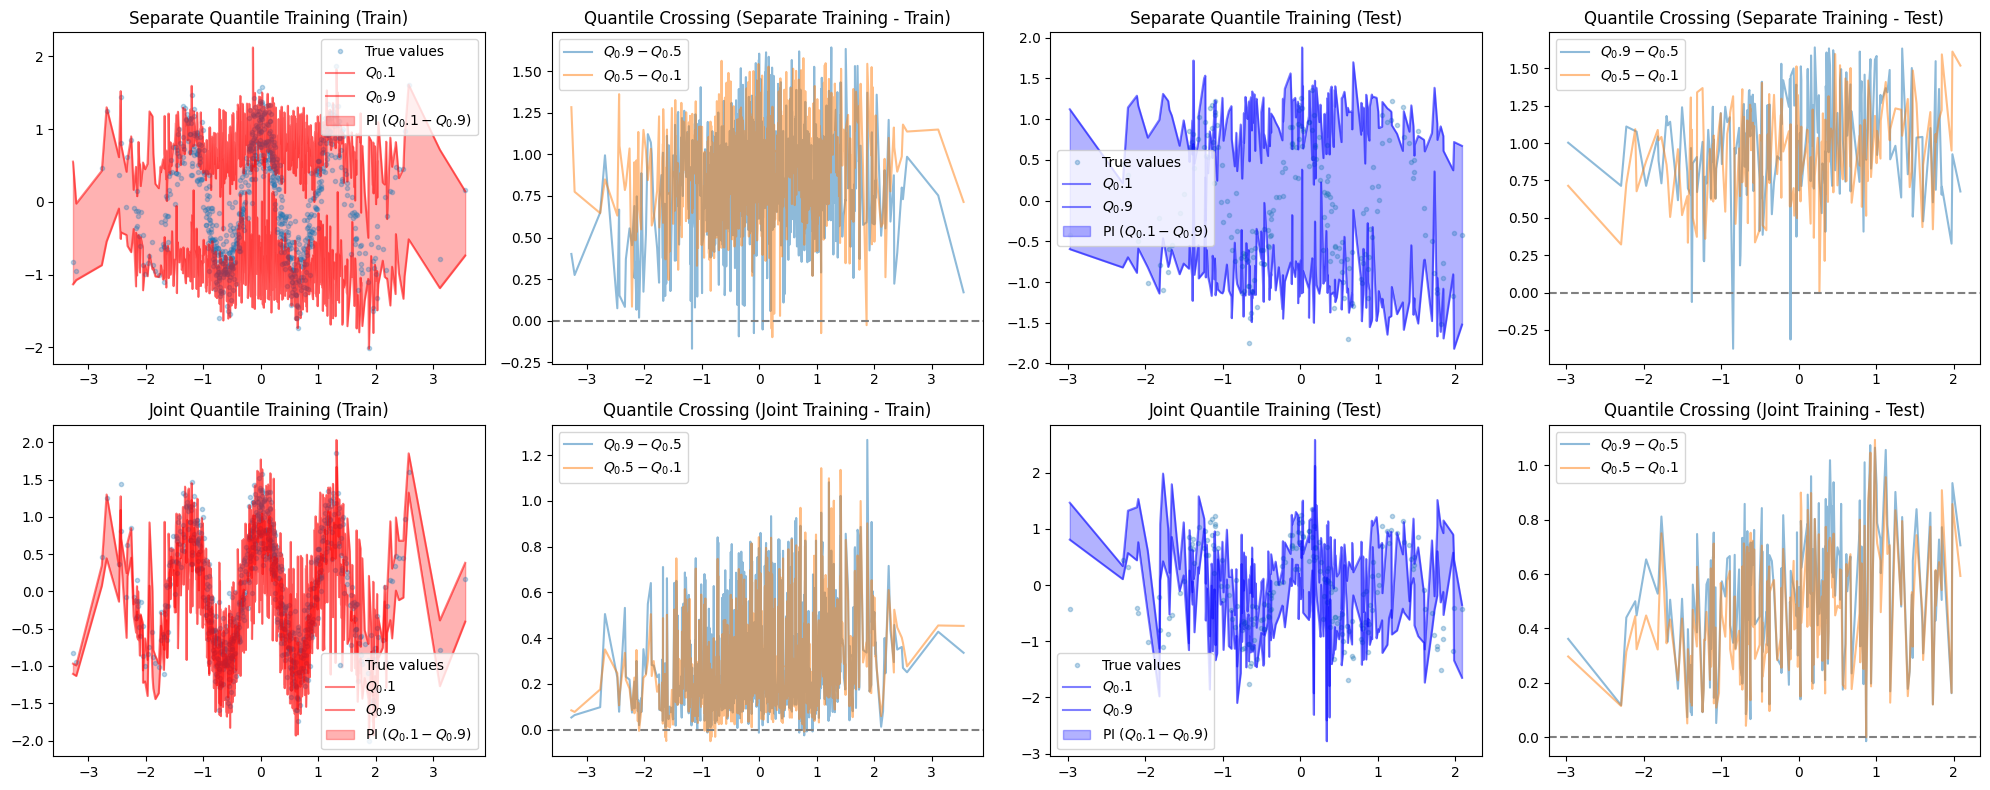

In [279]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ (ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Î∂Ñ)
sorted_indices_train = torch.sort(train_data.x[:, 0])[1].cpu()
sorted_indices_test = torch.sort(test_data.x[:, 0])[1].cpu()

sorted_x_train = train_data.x[sorted_indices_train, 0].cpu().numpy()
sorted_y_train = train_data.y[sorted_indices_train].cpu().numpy()

sorted_x_test = test_data.x[sorted_indices_test, 0].cpu().numpy()
sorted_y_test = test_data.y[sorted_indices_test].cpu().numpy()

plt.figure(figsize=(20, 8))

plt.subplot(241)
plt.title("Separate Quantile Training (Train)")
plt.plot(sorted_x_train, sorted_y_train, '.', alpha=0.3, label="True values")
plt.plot(sorted_x_train, predictions_train_sep[0][sorted_indices_train], alpha=0.5, label=f"$Q_{tau_low}$", color='red')
plt.plot(sorted_x_train, predictions_train_sep[2][sorted_indices_train], alpha=0.5, label=f"$Q_{tau_high}$", color='red')
plt.fill_between(sorted_x_train, predictions_train_sep[0][sorted_indices_train].squeeze(), predictions_train_sep[2][sorted_indices_train].squeeze(), alpha=0.3, label=f"PI ($Q_{tau_low} - Q_{tau_high}$)", color='red')
# plt.ylim(-4, 4)
plt.legend()

plt.subplot(242)
plt.title("Quantile Crossing (Separate Training - Train)")
plt.plot(sorted_x_train, predictions_train_sep[2][sorted_indices_train] - predictions_train_sep[1][sorted_indices_train], label=f"$Q_{tau_high} - Q_{0.5}$", alpha=0.5)
plt.plot(sorted_x_train, predictions_train_sep[1][sorted_indices_train] - predictions_train_sep[0][sorted_indices_train], label=f"$Q_{0.5} - Q_{tau_low}$", alpha=0.5)
plt.axhline(0, ls="--", color="gray")
# plt.ylim(-2, 4)
plt.legend()

plt.subplot(243)
plt.title("Separate Quantile Training (Test)")
plt.plot(sorted_x_test, sorted_y_test, '.', alpha=0.3, label="True values")
plt.plot(sorted_x_test, predictions_test_sep[0][sorted_indices_test], alpha=0.5, label=f"$Q_{tau_low}$", color='blue')
plt.plot(sorted_x_test, predictions_test_sep[2][sorted_indices_test], alpha=0.5, label=f"$Q_{tau_high}$", color='blue')
plt.fill_between(sorted_x_test, predictions_test_sep[0][sorted_indices_test].squeeze(), predictions_test_sep[2][sorted_indices_test].squeeze(), alpha=0.3, label=f"PI ($Q_{tau_low} - Q_{tau_high}$)", color='blue')
# plt.ylim(-4, 4)
plt.legend()

plt.subplot(244)
plt.title("Quantile Crossing (Separate Training - Test)")
plt.plot(sorted_x_test, predictions_test_sep[2][sorted_indices_test] - predictions_test_sep[1][sorted_indices_test], label=f"$Q_{tau_high} - Q_{0.5}$", alpha=0.5)
plt.plot(sorted_x_test, predictions_test_sep[1][sorted_indices_test] - predictions_test_sep[0][sorted_indices_test], label=f"$Q_{0.5} - Q_{tau_low}$", alpha=0.5)
plt.axhline(0, ls="--", color="gray")
# plt.ylim(-2, 4)
plt.legend()

plt.subplot(245)
plt.title("Joint Quantile Training (Train)")
plt.plot(sorted_x_train, sorted_y_train, '.', alpha=0.3, label="True values")
plt.plot(sorted_x_train, predictions_train[0][sorted_indices_train], alpha=0.5, label=f"$Q_{tau_low}$", color='red')
plt.plot(sorted_x_train, predictions_train[2][sorted_indices_train], alpha=0.5, label=f"$Q_{tau_high}$", color='red')
plt.fill_between(sorted_x_train, predictions_train[0][sorted_indices_train].squeeze(), predictions_train[2][sorted_indices_train].squeeze(), alpha=0.3, label=f"PI ($Q_{tau_low} - Q_{tau_high}$)", color='red')
# plt.ylim(-4, 4)
plt.legend()

plt.subplot(246)
plt.title("Quantile Crossing (Joint Training - Train)")
plt.plot(sorted_x_train, predictions_train[2][sorted_indices_train] - predictions_train[1][sorted_indices_train], label=f"$Q_{tau_high} - Q_{0.5}$", alpha=0.5)
plt.plot(sorted_x_train, predictions_train[1][sorted_indices_train] - predictions_train[0][sorted_indices_train], label=f"$Q_{0.5} - Q_{tau_low}$", alpha=0.5)
plt.axhline(0, ls="--", color="gray")
# plt.ylim(-2, 4)
plt.legend()

plt.subplot(247)
plt.title("Joint Quantile Training (Test)")
plt.plot(sorted_x_test, sorted_y_test, '.', alpha=0.3, label="True values")
plt.plot(sorted_x_test, predictions_test[0][sorted_indices_test], alpha=0.5, label=f"$Q_{tau_low}$", color='blue')
plt.plot(sorted_x_test, predictions_test[2][sorted_indices_test], alpha=0.5, label=f"$Q_{tau_high}$", color='blue')
plt.fill_between(sorted_x_test, predictions_test[0][sorted_indices_test].squeeze(), predictions_test[2][sorted_indices_test].squeeze(), alpha=0.3, label=f"PI ($Q_{tau_low} - Q_{tau_high}$)", color='blue')
# plt.ylim(-4, 4)
plt.legend()

plt.subplot(248)
plt.title("Quantile Crossing (Joint Training - Test)")
plt.plot(sorted_x_test, predictions_test[2][sorted_indices_test] - predictions_test[1][sorted_indices_test], label=f"$Q_{tau_high} - Q_{0.5}$", alpha=0.5)
plt.plot(sorted_x_test, predictions_test[1][sorted_indices_test] - predictions_test[0][sorted_indices_test], label=f"$Q_{0.5} - Q_{tau_low}$", alpha=0.5)
plt.axhline(0, ls="--", color="gray")
# plt.ylim(-2, 4)
plt.legend()

plt.tight_layout()
plt.show()

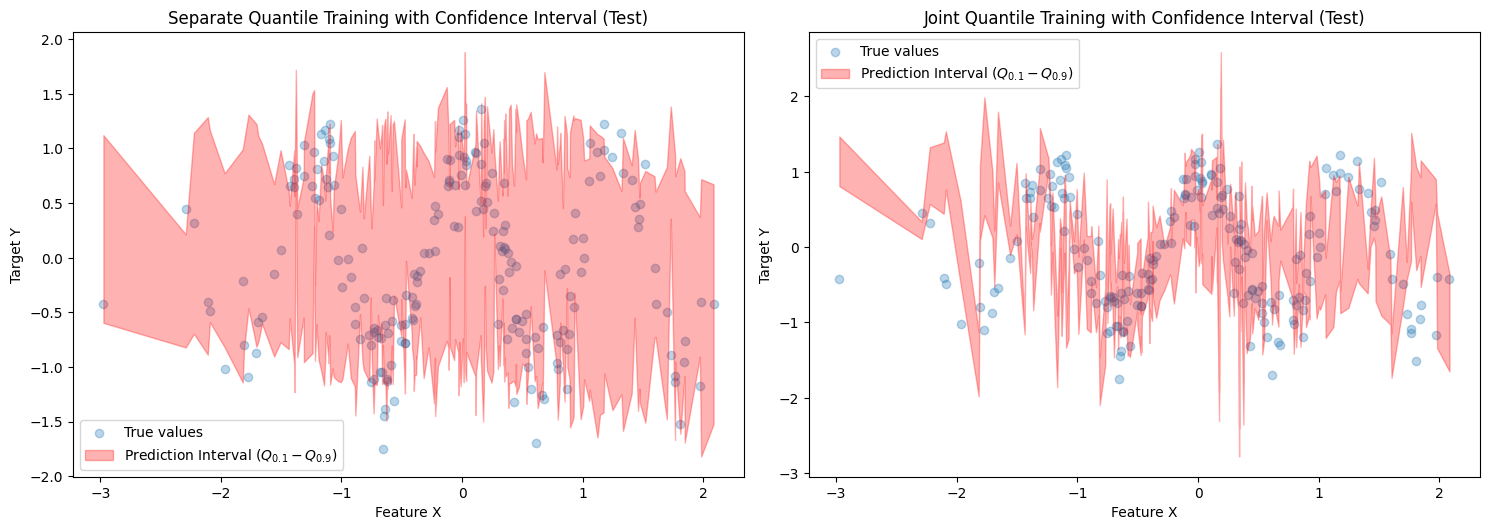

In [280]:
def to_numpy(tensor):
    if isinstance(tensor, torch.Tensor):
        return tensor.cpu().numpy().squeeze()  # üîπ Ï∞®Ïõê Ï∂ïÏÜåÌïòÏó¨ (N,) ÌòïÌÉúÎ°ú Î≥ÄÌôò
    return tensor

# üîπ Train Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò
predictions_train_sep_01 = to_numpy(predictions_train_sep[0])
predictions_train_sep_05 = to_numpy(predictions_train_sep[1])
predictions_train_sep_09 = to_numpy(predictions_train_sep[2])
predictions_train_joint = [to_numpy(p) for p in predictions_train]

sorted_indices_train = torch.sort(train_data.x[:, 0])[1].cpu().numpy()
sorted_x_train = train_data.x[sorted_indices_train, 0].cpu().numpy().squeeze()
sorted_y_train = train_data.y[sorted_indices_train].cpu().numpy().squeeze()

# üîπ Test Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò
predictions_test_sep_01 = to_numpy(predictions_test_sep[0])
predictions_test_sep_05 = to_numpy(predictions_test_sep[1])
predictions_test_sep_09 = to_numpy(predictions_test_sep[2])
predictions_test_joint = [to_numpy(p) for p in predictions_test]

sorted_indices_test = torch.sort(test_data.x[:, 0])[1].cpu().numpy()
sorted_x_test = test_data.x[sorted_indices_test, 0].cpu().numpy().squeeze()
sorted_y_test = test_data.y[sorted_indices_test].cpu().numpy().squeeze()

plt.figure(figsize=(15, 10))

# 1Ô∏è‚É£ Separate ÌïôÏäµÎêú Î™®Îç∏Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî (Train)
# plt.subplot(2, 2, 1)
# plt.title("Separate Quantile Training with Confidence Interval (Train)")
# plt.scatter(sorted_x_train, sorted_y_train, alpha=0.3, label="True values")
# plt.fill_between(sorted_x_train, 
#                  predictions_train_sep_01[sorted_indices_train].squeeze(), 
#                  predictions_train_sep_09[sorted_indices_train].squeeze(),
#                  color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# plt.plot(sorted_x_train, predictions_train_sep_05[sorted_indices_train].squeeze(), 
#          color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
# plt.xlabel("Feature X")
# plt.ylabel("Target Y")
# plt.ylim(-3, 3)
# plt.legend()

# 2Ô∏è‚É£ Separate ÌïôÏäµÎêú Î™®Îç∏Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî (Test)
plt.subplot(2, 2, 3)
plt.title("Separate Quantile Training with Confidence Interval (Test)")
plt.scatter(sorted_x_test, sorted_y_test, alpha=0.3, label="True values")
plt.fill_between(sorted_x_test, 
                 predictions_test_sep_01[sorted_indices_test].squeeze(), 
                 predictions_test_sep_09[sorted_indices_test].squeeze(),
                 color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# plt.plot(sorted_x_test, predictions_test_sep_05[sorted_indices_test].squeeze(), 
        #  color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
# plt.ylim(-3, 3)
plt.legend()

# # 3Ô∏è‚É£ Joint ÌïôÏäµÎêú Î™®Îç∏Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî (Train)
# plt.subplot(2, 2, 2)
# plt.title("Joint Quantile Training with Confidence Interval (Train)")
# plt.scatter(sorted_x_train, sorted_y_train, alpha=0.3, label="True values")
# plt.fill_between(sorted_x_train, 
#                  predictions_train_joint[0][sorted_indices_train].squeeze(), 
#                  predictions_train_joint[2][sorted_indices_train].squeeze(),
#                  color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# plt.plot(sorted_x_train, predictions_train_joint[1][sorted_indices_train].squeeze(), 
#          color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
# plt.xlabel("Feature X")
# plt.ylabel("Target Y")
# plt.ylim(-3, 3)
# plt.legend()

# 4Ô∏è‚É£ Joint ÌïôÏäµÎêú Î™®Îç∏Ïùò Ïã†Î¢∞Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôî (Test)
plt.subplot(2, 2, 4)
plt.title("Joint Quantile Training with Confidence Interval (Test)")
plt.scatter(sorted_x_test, sorted_y_test, alpha=0.3, label="True values")
plt.fill_between(sorted_x_test, 
                 predictions_test_joint[0][sorted_indices_test].squeeze(), 
                 predictions_test_joint[2][sorted_indices_test].squeeze(),
                 color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# plt.plot(sorted_x_test, predictions_test_joint[1][sorted_indices_test].squeeze(), 
        #  color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
# plt.ylim(-3, 3)
plt.legend()

plt.tight_layout()
plt.show()


#### single Î™®Îìú
* tau_lowÏôÄ tau_highÍ∞Ä Í≥†Ï†ïÎêú Í∞íÏóêÏÑú ÌïôÏäµÎê®
* Ï¶â, ÌäπÏ†ïÌïú Î∂ÑÏúÑÏàòÏóêÏÑúÎßå ÌïôÏäµÎêòÎØÄÎ°ú Î™®Îç∏Ïù¥ Ìï¥Îãπ Î∂ÑÏúÑÏàòÏóê ÏµúÏ†ÅÌôîÎêòÍ∏∞ Ïâ¨ÏõÄ
* Í≤∞Í≥ºÏ†ÅÏúºÎ°ú, Î™®Îç∏Ïù¥ ÌäπÏ†ï Î∂ÑÏúÑÏàòÏóêÏÑú Îçî Îπ†Î•¥Í≤å ÏàòÎ†¥Ìï† Ïàò ÏûàÏñ¥ ÏÜêÏã§ Í∞íÏù¥ ÎÇÆÍ≤å ÎÇòÏò¨ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº

#### all Î™®Îìú
* tau_lowÏôÄ tau_highÍ∞Ä ÎûúÎç§ÌïòÍ≤å Î≥ÄÌôîÌïòÎ©¥ÏÑú ÌïôÏäµÎê®
* Ï¶â, Î™®Îç∏Ïù¥ Î™®Îì† Î∂ÑÏúÑÏàòÏóê ÎåÄÌï¥ ÏùºÎ∞òÌôîÎêú ÌïôÏäµÏùÑ ÏàòÌñâÌï¥Ïïº Ìï®
* Îî∞ÎùºÏÑú, Îã§ÏñëÌïú Î∂ÑÏúÑÏàòÏóêÏÑú Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ ÎÇ¥ÎèÑÎ°ù ÌïôÏäµÌï¥Ïïº ÌïòÎØÄÎ°ú ÌïôÏäµÏù¥ Îçî Ïñ¥Î†§ÏõÄ
* Í≤∞Í≥ºÏ†ÅÏúºÎ°ú ÏÜêÏã§ Í∞íÏù¥ Îçî ÎÜíÏïÑÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº

In [108]:
import torch

def dynamic_quantile_adjustment(tau_low, tau_high, cvg_exp, cvg_target, learning_rate=0.05):
    """
    ÎèôÏ†Å Î∂ÑÏúÑÏàò Ï°∞Ï†ï Ìï®Ïàò
    - Coverage ErrorÍ∞Ä ÌÅ¨Î©¥ Î∂ÑÏúÑÏàòÎ•º Îçî Îπ†Î•¥Í≤å Ï°∞Ï†ï
    - tau_low, tau_highÍ∞Ä Ï†úÎåÄÎ°ú Ï°∞Ï†ïÎêòÎèÑÎ°ù Î≥¥Ïû•
    """
    cvg_error = cvg_target - cvg_exp  # Î™©Ìëú CoverageÏôÄ Ïã§Ï†ú Coverage Ï∞®Ïù¥ Í≥ÑÏÇ∞
    tau_adjustment = max(0.005, min(0.15, learning_rate * abs(cvg_error) ** 1.5))  # Î≥ÄÌôîÎüâ Ï¶ùÍ∞Ä

    # Î∂ÑÏúÑÏàò ÏóÖÎç∞Ïù¥Ìä∏
    tau_low_new = max(0.05, min(tau_low - tau_adjustment, tau_high - 0.05))
    tau_high_new = min(0.95, max(tau_high + tau_adjustment, tau_low + 0.05))

    return tau_low_new, tau_high_new


def train_gqnn_adj(model, optimizer, loss_fn, train_loader, train_mode="single", 
                   tau_low=0.1, tau_high=0.9, num_epochs=10000, cvg_target=0.9, lr_tau=0.01):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        tau_low_last = tau_low
        tau_high_last = tau_high
        epoch_cvg_exp = []
        
        for data in train_loader:
            optimizer.zero_grad()
            
            # ‚úÖ Î∂ÑÏúÑÏàò Î≤îÏúÑÎ•º `tau_low`, `tau_high`Ïóê ÎßûÏ∂∞ ÎèôÏ†ÅÏúºÎ°ú ÏÉòÌîåÎßÅ
            if train_mode == "all":
                taus_low = torch.rand(data.x.size(0), 1) * (tau_high - tau_low) + tau_low
                taus_high = torch.rand(data.x.size(0), 1) * (tau_high - tau_low) + tau_low
            else:
                taus_low = torch.full((data.x.size(0), 1), tau_low)
                taus_high = torch.full((data.x.size(0), 1), tau_high)
            
            y_low_pred = model(data.x, data.edge_index, taus_low)
            y_high_pred = model(data.x, data.edge_index, taus_high)
            
            loss_low = loss_fn(y_low_pred, data.y.view(-1, 1), taus_low)
            loss_high = loss_fn(y_high_pred, data.y.view(-1, 1), taus_high)
            cvg = cvg_loss(data.y.view(-1, 1), y_low_pred, y_high_pred, cvg_target=cvg_target)
            
            # ‚úÖ Coverage Loss Í∏∞Ïó¨ÎèÑÎ•º Ï¶ùÍ∞Ä
            loss = loss_low + loss_high + 10 * cvg  # Í∏∞Ï°¥Î≥¥Îã§ Coverage Loss Í∞ïÏ°∞
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            # ‚úÖ Î∞∞ÏπòÎ≥Ñ Coverage Í∞í Ï†ÄÏû•
            batch_cvg_exp = ((data.y.view(-1, 1) >= y_low_pred) & (data.y.view(-1, 1) <= y_high_pred)).float().mean()
            epoch_cvg_exp.append(batch_cvg_exp)

        # ‚úÖ ÏóêÌè¨ÌÅ¨ Ï†ÑÏ≤¥ ÌèâÍ∑† Coverage Í∏∞Î∞òÏúºÎ°ú Î∂ÑÏúÑÏàò ÏóÖÎç∞Ïù¥Ìä∏
        mean_cvg_exp = torch.stack(epoch_cvg_exp).mean().item()
        tau_low_last, tau_high_last = dynamic_quantile_adjustment(tau_low, tau_high, mean_cvg_exp, cvg_target, lr_tau)

        # ‚úÖ Epoch Î°úÍ∑∏ Ï∂úÎ†•
        if epoch % (num_epochs // 10) == 0:
            print(f"Epoch {epoch} - Coverage Loss: {cvg.item():.4f}, Coverage Error: {(cvg_target - mean_cvg_exp):.4f}")
            print(f"Epoch: {epoch}, Loss: {total_loss / len(train_loader):.4f}")
            print(f"Updated tau_low: {tau_low_last:.4f}, Updated tau_high: {tau_high_last:.4f}")
    
    return model, tau_low_last, tau_high_last

In [109]:
# Adj Î™®Îç∏ ÌïôÏäµ 
cvg_target = 0.9
lr_tau = 0.01


# single mode
print('Adj Single Training Mode')
adj_model_single, tau_low_single, tau_high_single = train_gqnn_adj(model, optimizer, loss_fn, train_loader, num_epochs=num_epochs, cvg_target=cvg_target, lr_tau=lr_tau)

adj_tr_true_single, adj_tr_low_single, adj_tr_high_single = test_gqnn(adj_model_single, train_loader, tau_low=tau_low_single, tau_high=tau_high_single)
adj_tr_coverage_single = evaluate_coverage(torch.tensor(adj_tr_true_single), torch.tensor(adj_tr_low_single), torch.tensor(adj_tr_high_single))
adj_tr_pi_single = evaluate_pi(torch.tensor(adj_tr_low_single), torch.tensor(adj_tr_high_single))

adj_ts_true_single, adj_ts_low_single, adj_ts_high_single = test_gqnn(adj_model_single, test_loader, tau_low=tau_low_single, tau_high=tau_high_single)
adj_ts_coverage_single = evaluate_coverage(torch.tensor(adj_ts_true_single), torch.tensor(adj_ts_low_single), torch.tensor(adj_ts_high_single))
adj_ts_pi_single = evaluate_pi(torch.tensor(adj_ts_low_single), torch.tensor(adj_ts_high_single))

print(f"Coverage_single training mode: {adj_tr_coverage_single:.4f}, {adj_ts_coverage_single:.4f}")
print(f"PI_single training mode: {adj_tr_pi_single:.4f}, {adj_ts_pi_single:.4f}")
print('-' * 100)

# all mode
print('Adj All Training Mode')
adj_model_all, tau_low_all, tau_high_all = train_gqnn_adj(model, optimizer_all, loss_fn, train_loader, train_mode="all", num_epochs=num_epochs, cvg_target=cvg_target, lr_tau=lr_tau)

adj_tr_true_all, adj_tr_low_all, adj_tr_high_all = test_gqnn(adj_model_all, train_loader, tau_low=tau_low_all, tau_high=tau_high_all)
adj_tr_coverage_all = evaluate_coverage(torch.tensor(adj_tr_true_all), torch.tensor(adj_tr_low_all), torch.tensor(adj_tr_high_all))
adj_tr_pi_all = evaluate_pi(torch.tensor(adj_tr_low_all), torch.tensor(adj_tr_high_all))

adj_ts_true_all, adj_ts_low_all, adj_ts_high_all = test_gqnn(adj_model_all, test_loader, tau_low=tau_low_all, tau_high=tau_high_all)
adj_ts_coverage_all = evaluate_coverage(torch.tensor(adj_ts_true_all), torch.tensor(adj_ts_low_all), torch.tensor(adj_ts_high_all))
adj_ts_pi_all = evaluate_pi(torch.tensor(adj_ts_low_all), torch.tensor(adj_ts_high_all))

print(f"Coverage_all training mode: {adj_tr_coverage_all:.4f}, {adj_ts_coverage_all:.4f}")
print(f"PI_all training mode: {adj_tr_pi_all:.4f}, {adj_ts_pi_all:.4f}")

Adj Single Training Mode
Epoch 0 - Coverage Loss: 0.1075, Coverage Error: 0.3315
Epoch: 0, Loss: 1.4982
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 50 - Coverage Loss: 0.1095, Coverage Error: 0.3314
Epoch: 50, Loss: 1.4983
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 100 - Coverage Loss: 0.1106, Coverage Error: 0.3315
Epoch: 100, Loss: 1.4985
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 150 - Coverage Loss: 0.1097, Coverage Error: 0.3315
Epoch: 150, Loss: 1.4985
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 200 - Coverage Loss: 0.1122, Coverage Error: 0.3314
Epoch: 200, Loss: 1.4987
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 250 - Coverage Loss: 0.1120, Coverage Error: 0.3315
Epoch: 250, Loss: 1.4988
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 300 - Coverage Loss: 0.1052, Coverage Error: 0.3315
Epoch: 300, Loss: 1.4986
Updated tau_low: 0.0950, Updated tau_high: 0.9050
Epoch 350 - Coverage Loss: 0.1175, Coverage Error:

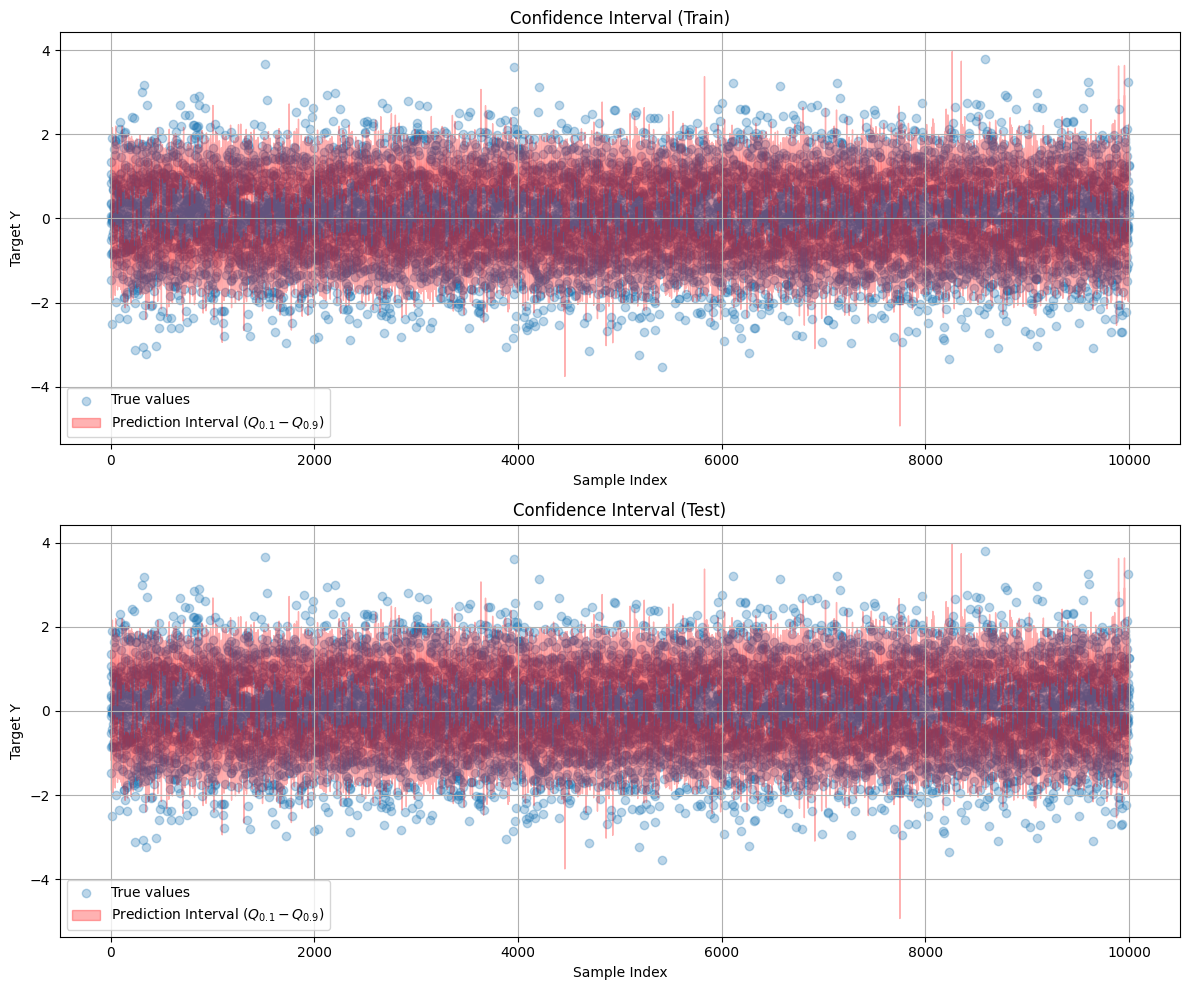

In [77]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ (ÏÉòÌîå Ïù∏Îç±Ïä§ Ïú†ÏßÄ)
sorted_indices_train = np.argsort(y_true.flatten())
sorted_y_train = y_true[sorted_indices_train].flatten()
sorted_y_low_train = y_low[sorted_indices_train].flatten()
sorted_y_high_train = y_high[sorted_indices_train].flatten()

sorted_indices_test = np.argsort(y_true.flatten())
sorted_y_test = y_true[sorted_indices_test].flatten()
sorted_y_low_test = y_low[sorted_indices_test].flatten()
sorted_y_high_test = y_high[sorted_indices_test].flatten()

# ÏõêÎûò ÏÉòÌîå ÏàúÏÑú Ïú†ÏßÄ
sample_indices_train = np.arange(len(y_true))  # ÌïôÏäµ ÏÉòÌîå Ïù∏Îç±Ïä§
sample_indices_test = np.arange(len(y_true))  # ÌÖåÏä§Ìä∏ ÏÉòÌîå Ïù∏Îç±Ïä§

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# üîπ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (ÏôºÏ™Ω Í∑∏ÎûòÌîÑ)
ax[0].set_title("Confidence Interval (Train)")
ax[0].scatter(sample_indices_train, y_true.flatten(), alpha=0.3, label="True values")
ax[0].fill_between(sample_indices_train, y_low.flatten(), y_high.flatten(),
                   color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# ax[0].plot(sample_indices_train, (y_low.flatten() + y_high.flatten()) / 2, 
#            color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
ax[0].set_xlabel("Sample Index")
ax[0].set_ylabel("Target Y")
ax[0].legend()
ax[0].grid(True)

# üîπ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ)
ax[1].set_title("Confidence Interval (Test)")
ax[1].scatter(sample_indices_test, y_true.flatten(), alpha=0.3, label="True values")
ax[1].fill_between(sample_indices_test, y_low.flatten(), y_high.flatten(),
                   color='red', alpha=0.3, label="Prediction Interval ($Q_{0.1} - Q_{0.9}$)")
# ax[1].plot(sample_indices_test, (y_low.flatten() + y_high.flatten()) / 2, 
#            color="blue", linewidth=2, label="Predicted Mean ($Q_{0.5}$)")
ax[1].set_xlabel("Sample Index")
ax[1].set_ylabel("Target Y")
ax[1].legend()
ax[1].grid(True)

# Ï†ÑÏ≤¥ Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨
plt.tight_layout()
plt.show()


In [ ]:
# Conformal Prediction
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

def train_gcn(model, data):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
    loss_fn = F.mse_loss
    
    model.train()
    epochs = 1000
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")
    
    return model

def cqr_conformal_interval(cal_labels, cal_lower, cal_upper, test_labels, test_lower, test_upper, alpha=0.1):
    """CQRÏùÑ ÌôúÏö©Ìïú Ïã†Î¢∞ Íµ¨Í∞Ñ Í≥ÑÏÇ∞"""
    cal_scores = np.maximum(cal_labels - cal_upper, cal_lower - cal_labels)
    qhat = np.quantile(cal_scores, np.ceil((len(cal_labels) + 1) * (1 - alpha)) / len(cal_labels), method='higher')
    
    pred_intervals = [test_lower - qhat, test_upper + qhat]
    coverage = ((test_labels >= pred_intervals[0]) & (test_labels <= pred_intervals[1])).mean()
    efficiency = np.mean(test_upper + qhat - (test_lower - qhat))
    
    return pred_intervals, coverage, efficiency

In [81]:
def coverage_loss(y_true, y_low, y_high, target_coverage=0.9):
    """
    Î™©Ìëú CoverageÎ•º Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌïú ÏÜêÏã§ Ìï®Ïàò.
    """
    coverage_exp = ((y_true >= y_low) & (y_true <= y_high)).float().mean()
    return (coverage_exp - target_coverage) ** 2

def piw_loss(y_low, y_high):
    """
    Ïã†Î¢∞ Íµ¨Í∞Ñ Ìè≠(PIW)ÏùÑ ÏµúÏÜåÌôîÌïòÎäî ÏÜêÏã§ Ìï®Ïàò.
    """
    return torch.mean(y_high - y_low)  # Íµ¨Í∞Ñ Ìè≠Ïùò ÌèâÍ∑†ÏùÑ ÏµúÏÜåÌôî

def dynamic_quantile_adjustment(q_low, q_high, coverage_exp, coverage_target, learning_rate=0.01):
    """
    Ïã§Ï†ú CoverageÍ∞Ä Î™©Ìëú CoverageÏóê ÎßûÎèÑÎ°ù Î∂ÑÏúÑÏàòÎ•º ÎèôÏ†ÅÏúºÎ°ú Ï°∞Ï†ïÌïòÎäî Ìï®Ïàò.
    """
    coverage_error = coverage_target - coverage_exp  # Î™©Ìëú CoverageÏôÄ Ïã§Ï†ú Coverage Ï∞®Ïù¥ Í≥ÑÏÇ∞
    q_low = q_low - learning_rate * coverage_error   # Coverage Î∂ÄÏ°± Ïãú ÌïòÌïúÍ∞í Ï°∞Ï†ï
    q_high = q_high + learning_rate * coverage_error # Coverage Î∂ÄÏ°± Ïãú ÏÉÅÌïúÍ∞í Ï¶ùÍ∞Ä
    return q_low, q_high





def total_loss(y_true, y_preds, edge_index, quantiles, target_coverage=0.9, edge_weight=0.1, piw_weight=0.1, coverage_weight=1.0):
    """
    ÏµúÏ¢Ö ÏÜêÏã§ Ìï®Ïàò:
    - Quantile Loss (Í∏∞Î≥∏ Î∂ÑÏúÑÏàò ÏÜêÏã§)
    - Graph Regularization (Ïù¥ÏõÉ ÎÖ∏Îìú Í∞Ñ Smoothness Ïú†ÏßÄ)
    - Coverage Loss (Coverage Î≥¥Ïû•)
    - PIW Loss (Ïã†Î¢∞ Íµ¨Í∞Ñ Ìè≠ ÏµúÏ†ÅÌôî)
    """
    y_low, y_mid, y_high = y_preds  # ÏòàÏ∏°Îêú Î∂ÑÏúÑÏàò Í∞í Î∂ÑÎ¶¨

    # Î∂ÑÏúÑÏàò ÏÜêÏã§ (Quantile Loss)
    loss_q = sum(QuantileLoss()(y_pred, y_true, q) for y_pred, q in zip(y_preds, quantiles))

    # Í∑∏ÎûòÌîÑ Ï†ïÍ∑úÌôî (Graph Smoothness Loss)
    src, dst = edge_index
    loss_graph = edge_weight * torch.mean((y_preds[1][src] - y_preds[1][dst]) ** 2)

    # Coverage Î≥¥Ïû• ÏÜêÏã§
    loss_coverage = coverage_weight * coverage_loss(y_true, y_low, y_high, target_coverage)

    # Ïã†Î¢∞ Íµ¨Í∞Ñ Ìè≠(PIW) ÏµúÏ†ÅÌôî ÏÜêÏã§
    loss_piw = piw_weight * piw_loss(y_low, y_high)

    return loss_q + loss_graph + loss_coverage + loss_piw

In [38]:
# ÌïôÏäµ Ìï®Ïàò
# Joint Quantile Learning Ï†ÅÏö© (Multi-Quantile trainig)
# Ïó¨Îü¨ Î∂ÑÏúÑÏàòÎ•º ÎèôÏãúÏóê ÌïôÏäµÌïòÏó¨ Î∂ÑÏúÑÏàò ÍµêÏ∞® Î¨∏Ï†ú ÏôÑÌôî

def train_gqnn(data, device, target_coverage=0.9, q="all"):    
    model = GCNQuantile(in_channels=data.x.size(1), hidden_channels=16).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)
    data = data.to(device)

    # Ï¥àÍ∏∞ Î∂ÑÏúÑÏàò ÏÑ§Ï†ï (q_low: 10%, q_high: 90%)
    q_low, q_high = 0.1, 0.9
    learning_rate = 0.01  # Î∂ÑÏúÑÏàò Ï°∞Ï†ï ÏÜçÎèÑ

    epochs = 1000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Ïó¨Îü¨ Î∂ÑÏúÑÏàòÎ•º ÎèôÏãúÏóê ÌïôÏäµ (Joint Quantile Training)
        if q == "all":
            taus = torch.rand(data.x.size(0), 1).to(device)
        else:
            taus = torch.full((data.x.size(0), 1), q, device=device)

        y_preds = model(data.x, data.edge_index, taus)
        y_low = y_preds[:, 0]  # Ï≤´ Î≤àÏß∏ Ïó¥Ïù¥ 10% Î∂ÑÏúÑÏàò
        y_mid = y_preds[:, 1]  # Îëê Î≤àÏß∏ Ïó¥Ïù¥ 50% Î∂ÑÏúÑÏàò
        y_high = y_preds[:, 2]  # ÏÑ∏ Î≤àÏß∏ Ïó¥Ïù¥ 90% Î∂ÑÏúÑÏàò

        # ÏÜêÏã§ Í≥ÑÏÇ∞ (Coverage + PIW ÏµúÏ†ÅÌôî Ìè¨Ìï®)
        loss = total_loss(data.y, y_preds, data.edge_index, model.quantiles)

        loss.backward()
        optimizer.step()

        # ÌòÑÏû¨ Coverage Ï∏°Ï†ï
        coverage_exp = evaluate_coverage(data.y, y_low, y_high)

        # Coverage Î≥¥Ïû•: Î∂ÑÏúÑÏàò ÏóÖÎç∞Ïù¥Ìä∏
        q_low, q_high = dynamic_quantile_adjustment(q_low, q_high, coverage_exp, target_coverage, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Coverage = {coverage_exp:.4f}, PIW = {(y_high - y_low).mean().item():.4f}")

    return model

In [39]:
# ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑ†ÌÉù (Cora, Citeseer, Pubmed)
dataset_name = "Cora"  # "Citeseer", "Pubmed", "Computers", "Photo" Îì±ÎèÑ Í∞ÄÎä•
dataset = Planetoid(root='/tmp/' + dataset_name, name=dataset_name, transform=T.NormalizeFeatures())

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞
data = dataset[0]
data.y = data.y.float().view(-1, 1)  # ÌÉÄÍ≤ü Í∞íÏùÑ floatÌòïÏúºÎ°ú Î≥ÄÌôò (ÌöåÍ∑Ä ÏàòÌñâ Í∞ÄÎä•ÌïòÎèÑÎ°ù Î≥ÄÍ≤Ω)

In [40]:
print(f"Dataset: {dataset_name}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of features per node: {data.num_features}")
print(f"Number of classes: {dataset.num_classes}")  # ÏõêÎûò Î∂ÑÎ•ò Î¨∏Ï†úÏù¥ÎØÄÎ°ú ÌÅ¥ÎûòÏä§ Í∞úÏàò Ï∂úÎ†•

Dataset: Cora
Number of nodes: 2708
Number of edges: 10556
Number of features per node: 1433
Number of classes: 7


In [41]:
# GPU ÏÇ¨Ïö© Ïó¨Î∂Ä ÌôïÏù∏
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)

# Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ (Coverage Î≥¥Ïû• & Ïã†Î¢∞ Íµ¨Í∞Ñ ÏµúÏ†ÅÌôî Ìè¨Ìï®)
model = train_gqnn(data, device, q="all")

ValueError: too many values to unpack (expected 3)